
# Business Analytics - Predicting weight of fish

***

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Overview of dataset with *pandas*](#0)<br>

1. [Exploratory Data Analysis](#2)<br>
1. [Model Selection](#4) <br>
1. [Conclusion](#6) <br>

</div>


***

# Overview of dataset with *pandas* <a id="0"></a>




The first step is to import the packages: *pandas*, *numpy*, *matplotlib*, *sklearn* and *seaborn*.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
import numpy as np

Let's begin with reading our csv using *pandas*'s `pd.read_csv()` method then get an overview of the data by viewing size of the dataframe as well as a list of the column headers and the type of data stored within each columnm. We will also check for count of null entries in each column as below. 

In [ ]:
df = pd.read_csv('Fish.csv')

print('Size of dataframe:')
print(df.shape)
print()

print('List of columns:')
df.columns = list(map(str, df.columns))
print(df.columns.tolist())
print()

print('Data type of each column:')
print(df.dtypes)
print()

print('Data type of all column headers:')
print(type(df.columns.tolist()))
print()

print('Data type of index header:')
print(type(df.index.tolist()))
print()

print('Count of null entries:')
print(df.isnull().sum())
print()

#print(df.isna().sum())
#list of indices
#print(df.index)
#print(type(df.index))
#df.index.tolist()

#df.drop(['Key','Date','Weekend'], axis=1, inplace=True)

#df.set_index('Day_total', inplace=True)

Size of dataframe:
(159, 7)

List of columns:
['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']

Data type of each column:
Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

Data type of all column headers:
<class 'list'>

Data type of index header:
<class 'list'>

Count of null entries:
Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64



The data seems to be free of null entries and good to use for further analysis.

Please note that the default type of instance variables `index` and `columns` are **NOT** `list`. To get the index and columns as lists, we can use the `.tolist()` method as above.
This will make it easier to identify certain columns and match the index column.

In [ ]:
df.head(20)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


Let's see the unique species in our data.

In [ ]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [ ]:
#Preparing data for regression
reg_data = df[['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height','Width']]
reg_data.head(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


Finally, let's get a quick set of summary statistics for each column in our dataframe using the `.describe()` method, then visualise these numbers through boxplots and histograms.


In [ ]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


<AxesSubplot:>

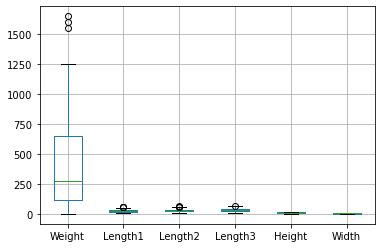

In [ ]:
df.boxplot()

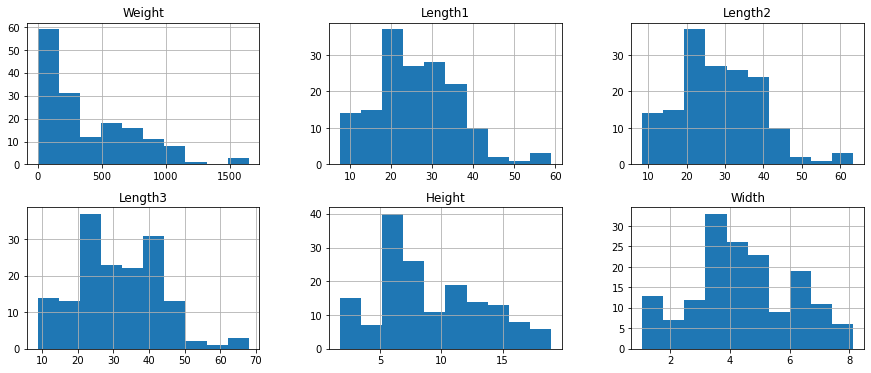

In [ ]:
data_num = df.drop(columns=["Species"])

fig, axes = plt.subplots(len(data_num.columns)//3, 3, figsize=(15, 6))
i = 0
for triaxis in axes:
    for axis in triaxis:
        data_num.hist(column = data_num.columns[i], ax=axis)
        i = i+1

***

# Exploratory Data Analysis


We want to discover the average weight of each species, by appending `.plot()` to the `avg_weight` dataframe as detailed below.

`avg_weight` illustrates the average weight of each species.


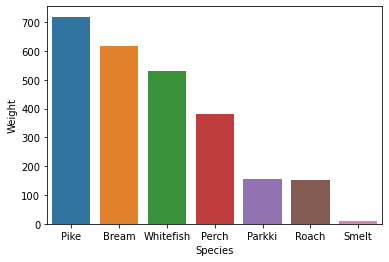

In [ ]:
#Selecting columns from df dataframe
avg_weight = df[['Species', 'Weight']]

#Group selected data by species in order to calculate average weight for each species
avg_weight = avg_weight.groupby(by=['Species'], as_index=False).mean().sort_values(by=['Weight'], ascending=False)

#By default, grouping the data results in the parameter we are grouping by, to become the index.
#We will reset the index so that we can later use 'Species' column in plots.
avg_weight.reset_index()

ax = sns.barplot(x="Species", y="Weight", data=avg_weight)

Illustrated below is the distribution of weight by species.

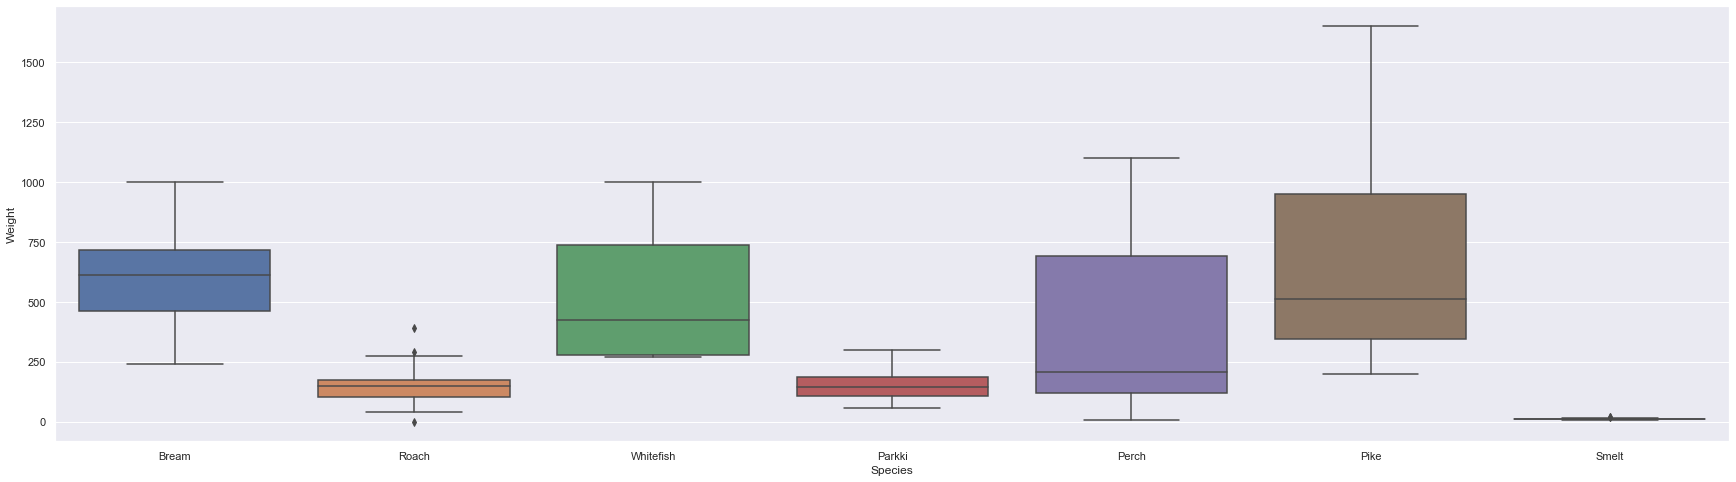

In [ ]:
sns.set(rc = {'figure.figsize':(30,8)})
ax = sns.boxplot(x="Species", y="Weight", data=df)

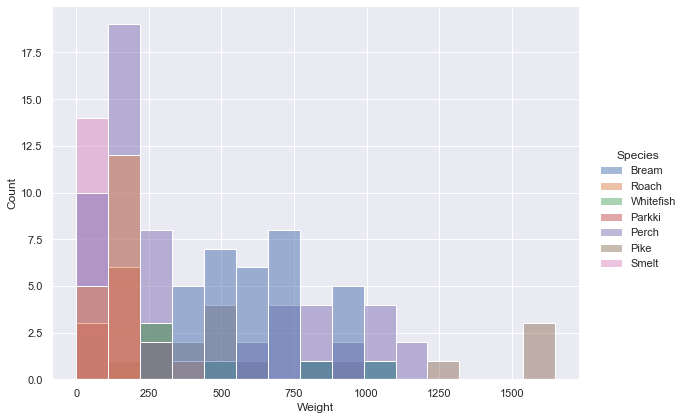

In [ ]:
sns.displot(
  data=df,
  x="Weight",hue="Species",kind="hist",height=6,aspect=1.4,bins=15
)
plt.show();

Let's plot the association of variables with each other, as well frequency distribution of each variable.

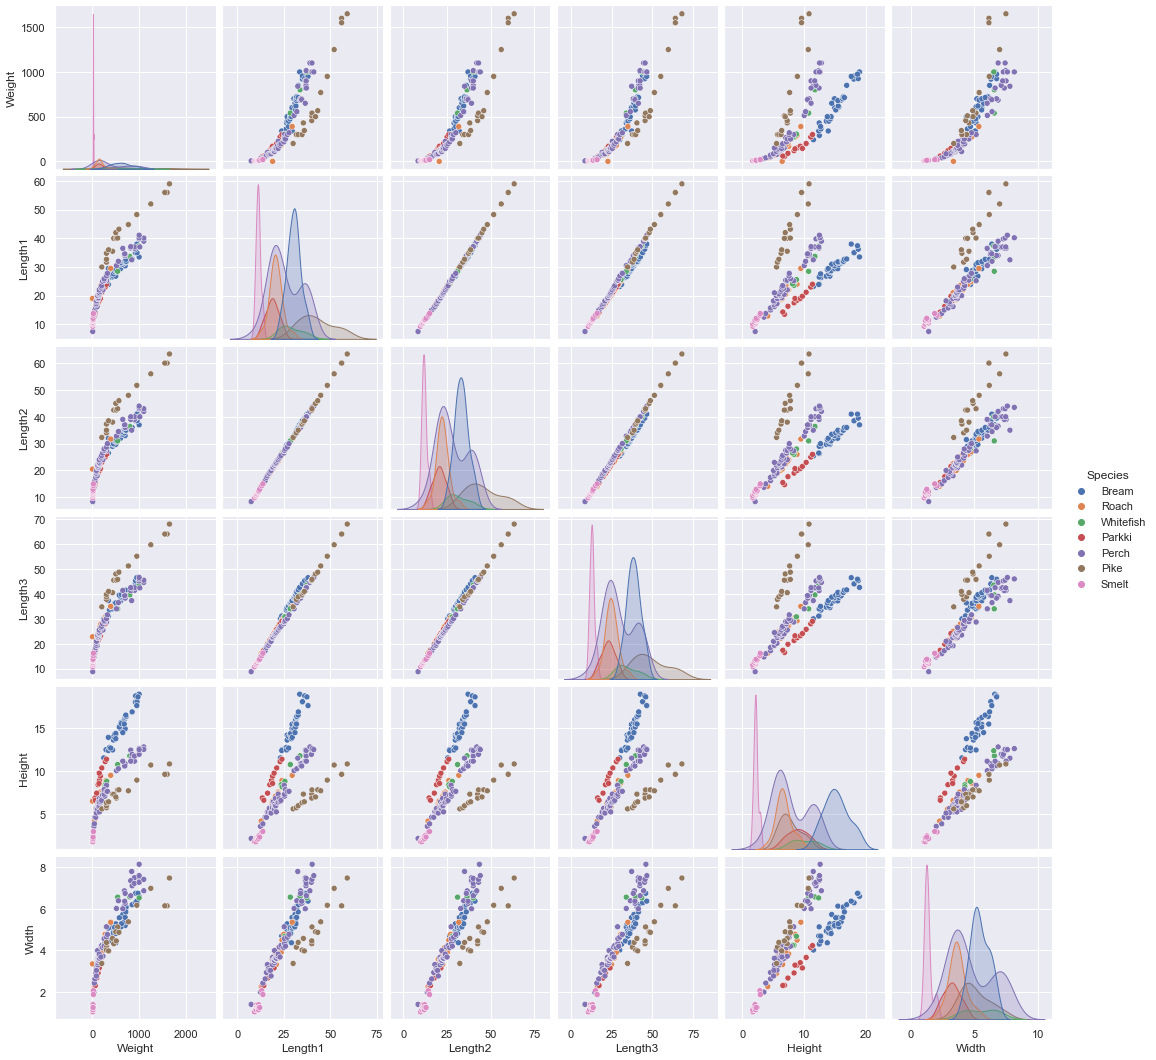

In [ ]:
sns.pairplot(data=df, kind='scatter', hue='Species')

Target variable distribution with respect to species shows that there are some species such as Pike that have huge weight compared to others. This visualization gives us additional information on how the “species” feature can be used for prediction.

And finally we want to see correlation between the target variable and features.

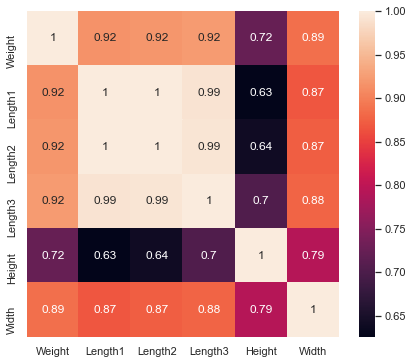

In [ ]:
#correlation between the target variable and features?
plt.figure(figsize=(7,6))
corr = data_num.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)
plt.show()

From the above, we can see that all the variables have a strong positive correlation with weight.
This means that weight increases as each of the variables (length1, length2, length3, height, width) increase.

In the next section, we will look at the association of each variable with weight in more detail.

***

# Model Selection

We will convert the species column into 7 features using 'get_dummies' to prepare the data for regression.

In [ ]:
df = pd.get_dummies(df)
df.head()

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0


We will train 3 different models and test which model produces the most accurate results.

Linear Regression
Lasso Regression
Ridge Regression
Linear regression is an algorithm which predicts target variable Y based on Independent variables X. The term linear models mean that the model is specified as a linear combination of features.

Laso is a slight modification of linear Regression. It performs L1 regularization, which means that it adds penalty equivalent to the absolute value of the magnitude of coefficients. Why do we need it? Because it finally decreases large weights to small ones and small weights to almost zero. This kind of method, in theory, can be used when we do have a lot of features in the training data and we know that not all the features are important. Lasso regression will help to identify selecting a few most important features out of plenty of features.

Ridge Regression s also a slight modification of linear regression with L2 regularization, which means that it penalizes the model from the sum of squared value of the weights. Thus, it results in to decrease in the absolute value of coefficients and having coefficients that are evenly distributed. If we have a few features and we know that they all might affect prediction, we can use ridge regression in this case.

In [ ]:
#Clean the data
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#ct = make_column_transformer(
    #(StandardScaler(),['Length1','Length2','Length3','Height','Width']), #turn all values from 0 to 1
    #(OneHotEncoder(handle_unknown="ignore"), ["Species"])
#)

#create X and y values
data_cleaned =   df.drop("Weight",axis=1)
y = df['Weight']

x_train, x_test, y_train, y_test = train_test_split(data_cleaned,y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
#X_train_normal = pd.DataFrame(ct.fit_transform(x_train))
#X_test_normal = pd.DataFrame(ct.transform(x_test))

(127, 12) (32, 12) (127,) (32,)


Let's evaluate the accuracy of each model to pick out the best model for predicting weight.

In [ ]:
#Train the model /we train different models and
# measure the accuracy of mean square error(MSE), mean absolute error(MAE), R² score.
def models_score(model_name, train_data, y_train, val_data,y_val):
    model_list = ["Linear_Regression","Lasso_Regression","Ridge_Regression"]
    #model_1
    if model_name=="Linear_Regression":
        reg = LinearRegression()
    #model_2
    elif model_name=="Lasso_Regression":
      reg = Lasso(alpha=0.1,tol=0.03)

    #model_3
    elif model_name=="Ridge_Regression":
        reg = Ridge(alpha=1.0)
    else:
        print("please enter correct regressor name")

    if model_name in model_list:
        reg.fit(train_data,y_train)
        pred = reg.predict(val_data)

        score_MSE = mean_squared_error(pred, y_val)
        score_MAE = mean_absolute_error(pred, y_val)
        score_r2score = r2_score(pred, y_val)
        return round(score_MSE,2), round(score_MAE,2), round(score_r2score,2)
model_list = ["Linear_Regression","Lasso_Regression","Ridge_Regression"]
result_scores = []
for model in model_list:
    score = models_score(model,x_train,y_train, x_test,y_test)
    result_scores.append((model, score[0], score[1],score[2]))
    print(model,score)

Linear_Regression (7007.38, 65.3, 0.94)
Lasso_Regression (7664.05, 66.65, 0.93)
Ridge_Regression (7276.48, 68.38, 0.94)


C:\Users\Abdullah Tariq\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 538081.3016113744, tolerance: 468356.51958425186
  model = cd_fast.enet_coordinate_descent(


In [ ]:
df_result_scores = pd.DataFrame(result_scores,columns=["model","mse","mae","r2score"])
df_result_scores

,model,mse,mae,r2score
0,Linear_Regression,7007.38,65.30,0.94
1,Lasso_Regression,7664.05,66.65,0.93
2,Ridge_Regression,7276.48,68.38,0.94


The best model has low MSE and MAE values and high R² scores. As the result shows simple linear regression performed better than Lasso Regression and Ridge Regression in this dataset.

***

# Conclusion

Let's see how well the linear regression model works by plotting predicted values and true values on the same plot.

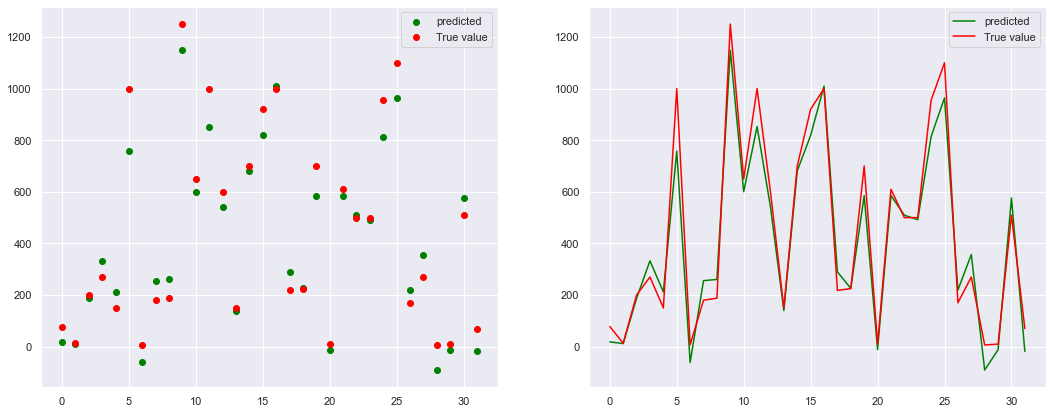

In [ ]:
# winner model
reg = LinearRegression()
reg.fit(x_train,y_train)
pred = reg.predict(x_test)
plt.figure(figsize=(18,7))
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.scatter(range(0,len(x_test)), pred,color="green",label="predicted")
plt.scatter(range(0,len(x_test)), y_test,color="red",label="True value")
plt.legend()

plt.subplot(1, 2, 2) # index 2
plt.plot(range(0,len(x_test)), pred,color="green",label="predicted")
plt.plot(range(0,len(x_test)), y_test,color="red",label="True value")
plt.legend()
plt.show()

In the visualization above, the predicted values are close to the true value values, which means that the model works well.

So linear regression is without regularization (no penalty on parameters). It sometimes can assign a high weight to some features, and lead to overfitting in the small datasets. That is why Lasso regression (Same as L1 regularization) or Ridge Regression (L2 regularization) models are used to adjust the weight of the independent variables. In general, if the number of data features is much less than the number of samples (#features << #rows) then it is likely that simple linear regression would work better. However, if a number of features are not much less than a number of samples it will tend to have high variance and low accuracy, in that case, Lasso and Ridge are more likely to work better.

Let's use our model to make a prediction

In [ ]:
reg.predict([[23.2,25.4,30.0,11.52,4.0200,1,0,0,0,0,0,0]])

array([290.82092384])

Actual weight is 242.

In [ ]:
reg.predict([[26.5,29.0,34.0,12.440,5.1340,1,0,0,0,0,0,0]])

array([450.26859852])

Actual weight is 430.